# Analytical functions - cheet sheet 

In [175]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

import random
import scipy

pd.set_option('display.max_rows',None)

In [46]:
def cdf(dist):
    values, counts = np.unique(np.sort(dist),return_counts=True)
    
    cdf_val = []
    for i in range(0,len(values)):
        if len(cdf_val)==0:
            cdf_val.append(counts[i])
        else:
            cdf_val.append(cdf_val[-1] + counts[i])
        
    total_counts = sum(counts)
    
    cdf_val = cdf_val/total_counts
    
    return values, cdf_val

In [195]:
def plot_all_view(dist, cdf_dist, values):
    sns.set_context('talk')
    fig, ax = plt.subplots(figsize=(18,10),nrows=2,ncols=2)

#     sns.histplot(dist,ax=ax[0,0]).set(title='Frequency distribution',xlabel='x')
#     sns.lineplot(x=values, y=cdf_dist, ax=ax[0,1]).set(title='Cumulative distribution function',xlabel='x',ylabel='CDF')
    
    sns.lineplot(x=values, y=cdf_dist, ax=ax[0,0]).set(xscale='log',title='CDF on log-x scale')
    sns.lineplot(x=values, y=cdf_dist, ax=ax[0,1]).set(yscale='log',title='CDF on log-y scale')
    
    sns.lineplot(x=values, y=1-cdf_dist, ax=ax[1,0])
    ax[1,0].set(xscale='log',yscale='log',title='CCDF on log-log scale',ylabel='log(CCDF)')
    
    index_cut_cdf = np.where(uniform_cdf ==0.998)[0][0]
    sns.lineplot(x=values[:index_cut_cdf], y=abs(np.log10(1-cdf_dist[:index_cut_cdf])), ax=ax[1,1])
    ax[1,1].set(xscale='log',yscale='log',title='CCDF on loglog y log-x scale',ylabel='log(abs(log(CCDF)))')
    
    
    plt.tight_layout()

## normal probability plot

A plot of the values in a sample versus random values from a standard normal distribution.

In [153]:
def make_normal_plot(data,datalabel='data',title='Normal probability plot'):
    plt.figure(figsize=[7,7])
    
    # create  a random sample from a normal distribution
    xs = np.random.normal(loc=0, scale=1, size=len(data))
    xs = np.sort(xs)
    
    # plot stright line
    xl = np.linspace(min(xs), max(xs),100)
    yl = pd.Series(data).mean() + pd.Series(data).std()*xl
    
    sns.lineplot(x=xl, y=yl, color='gray')
    
    # plot data vs random values
    ax = sns.lineplot(x=xs, y=np.sort(data))
    ax.set(title=title,xlabel='Standart deviation from mean',
           ylabel=datalabel)
    
    plt.legend(['ideal case (normal dist. for exp.data)',datalabel])

In [159]:
sample_size = 10000

# Uniform

In [81]:
uniform=[]
for i in range(0,sample_size):
    uniform.append(random.random())

In [82]:
uniform_vals, uniform_cdf = cdf(uniform)

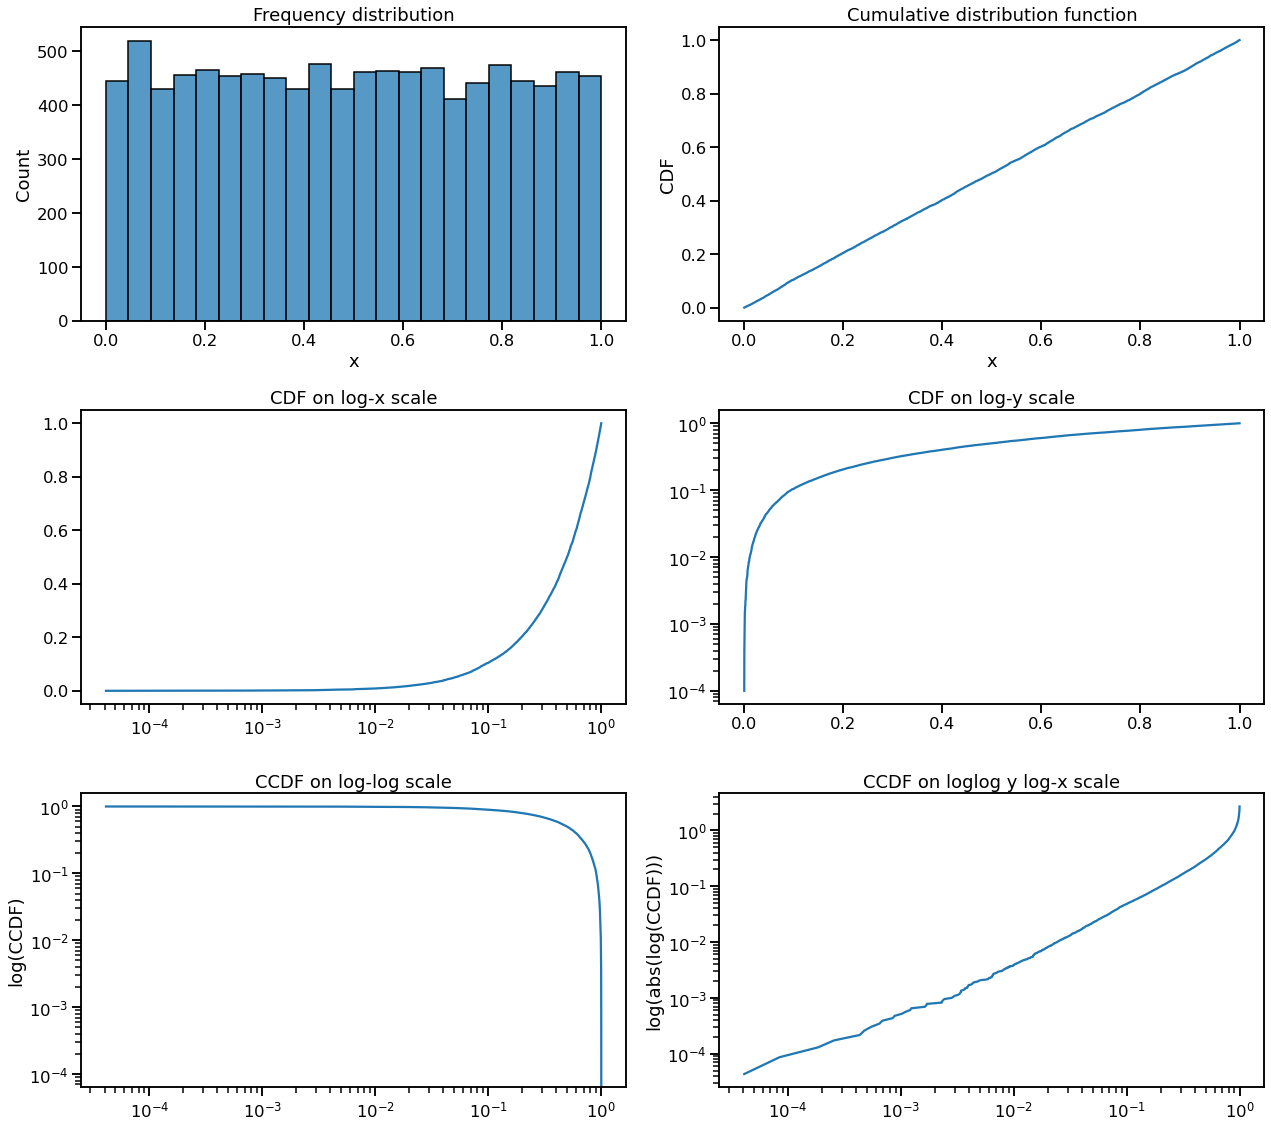

In [190]:
plot_all_view(uniform,uniform_cdf,uniform_vals)

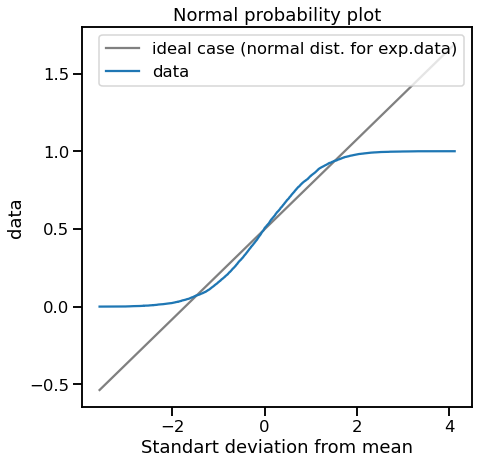

In [154]:
make_normal_plot(uniform)

# Triangular

In [155]:
triangle=[]
for i in range(0,sample_size):
    triangle.append(random.triangular())

In [156]:
triangle_vals, triangle_cdf = cdf(triangle)

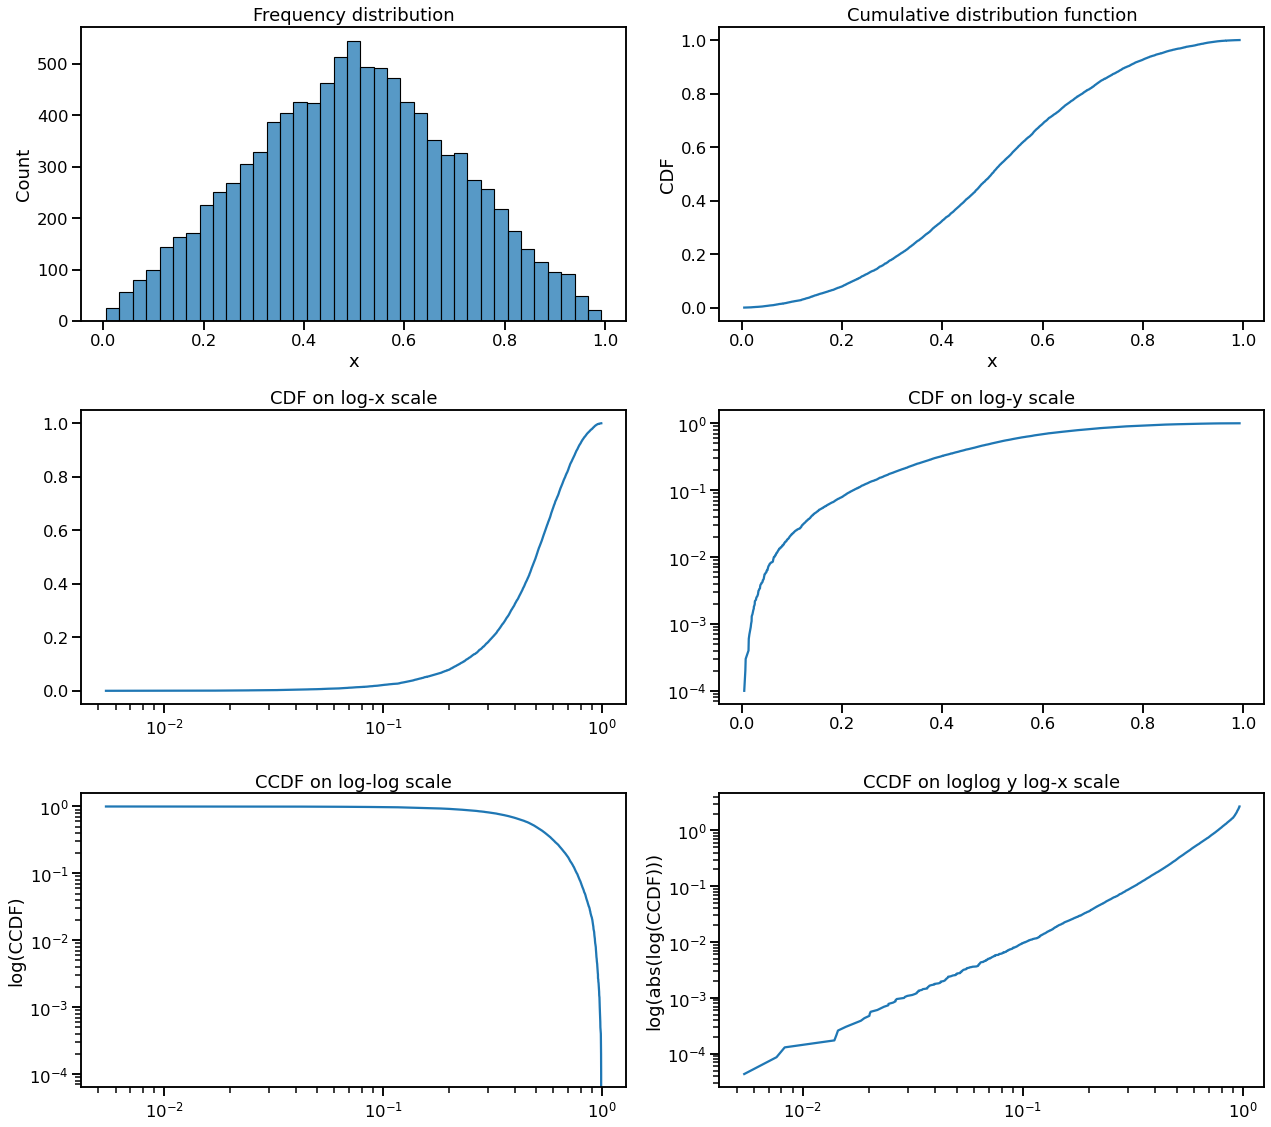

In [157]:
plot_all_view(triangle,triangle_cdf,triangle_vals)

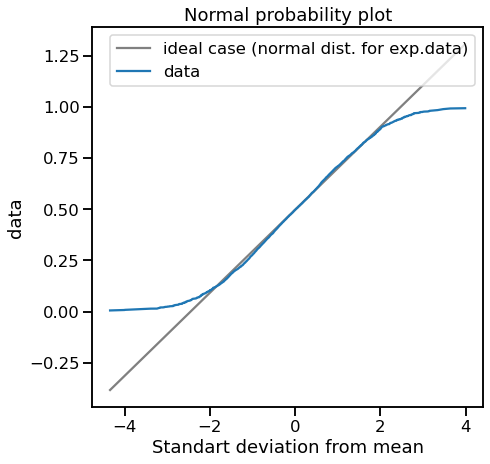

In [158]:
make_normal_plot(triangle)

# Exponential

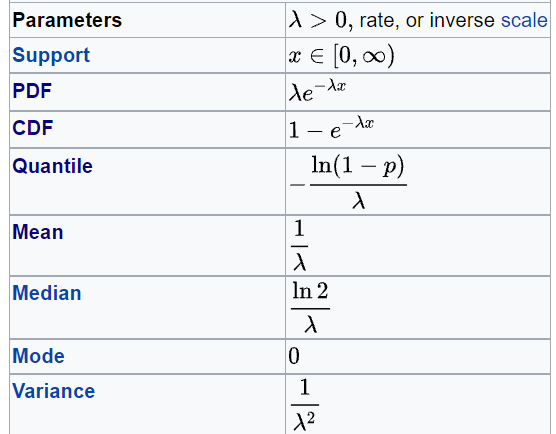

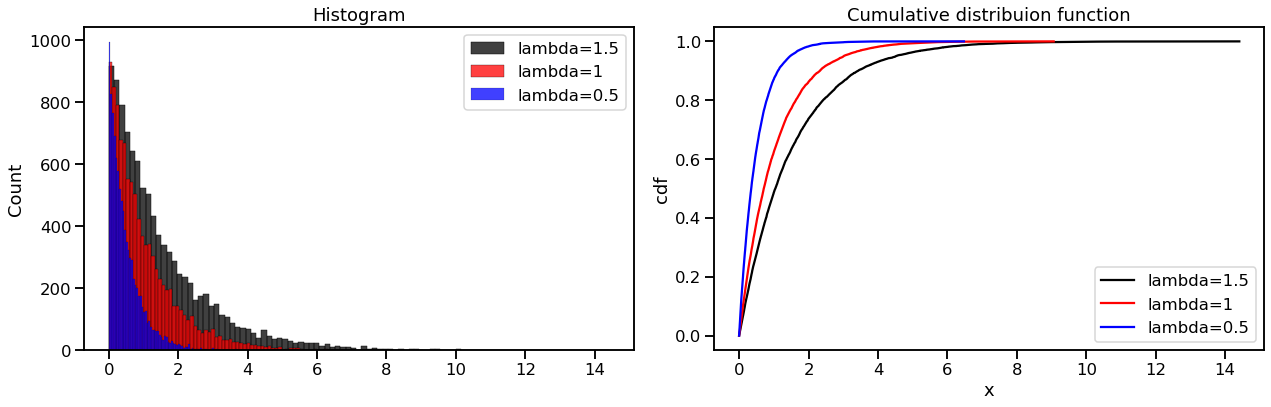

In [200]:
fig, ax = plt.subplots(figsize=[18,6], ncols=2, nrows=1)
colors = ['blue','red','black']

lambda_arrays = [1.5,1,0.5]

for lam in lambda_arrays:
    color = colors.pop()
    exp_dist = np.random.exponential(lam,10000)
    sns.histplot(exp_dist,ax=ax[0],color=color)
    
    exp_vals, exp_cdf = cdf(exp_dist)
    sns.lineplot(x=exp_vals, y=exp_cdf, ax=ax[1], color=color)


    
ax[0].legend([f'lambda={lam}' for lam in lambda_arrays])
ax[1].legend([f'lambda={lam}' for lam in lambda_arrays])

ax[0].set(title='Histogram')
ax[1].set(ylabel='cdf', xlabel='x',title='Cumulative distribuion function')

plt.tight_layout()

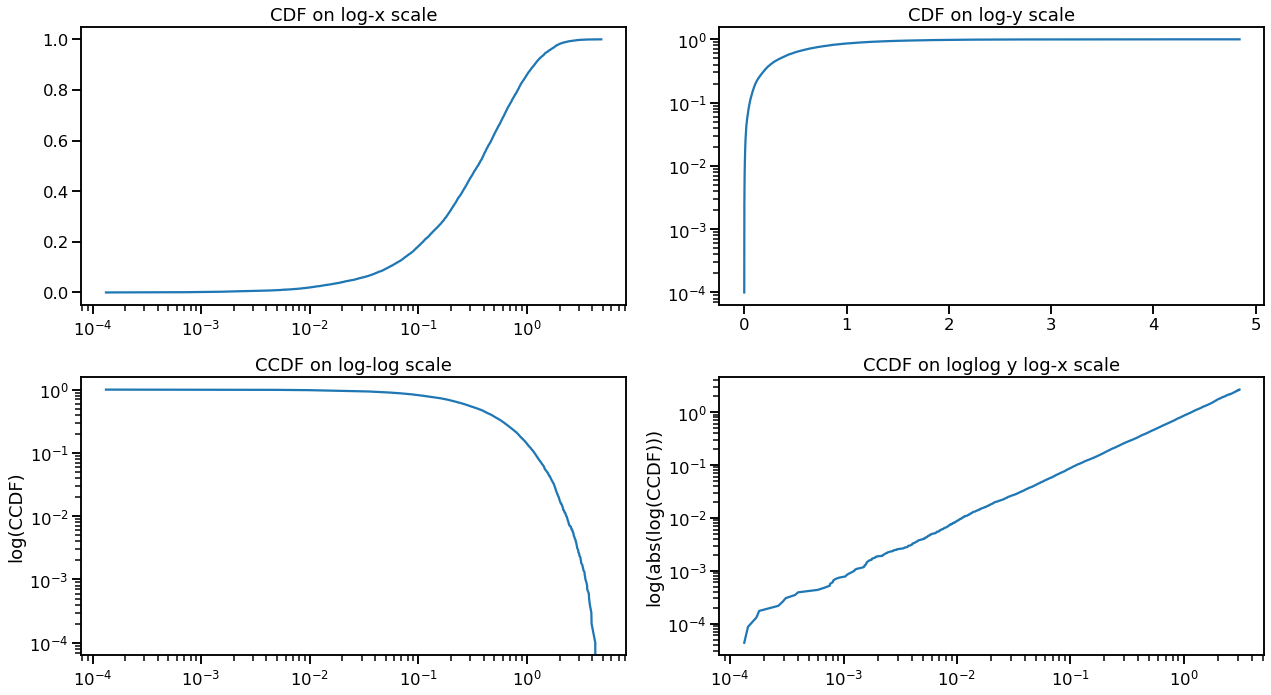

In [196]:
exponential = np.random.exponential(0.5,10000)

exponential_vals, exponential_cdf = cdf(exponential)

plot_all_view(exponential,exponential_cdf,exponential_vals)

# Pareto

 Pareto distributions are often the result of generative processes with positive feedback (so-called preferential attachment processes: see http://wikipedia.org/wiki/Preferential_attachment.).

In [ ]:
exponential_vals